In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

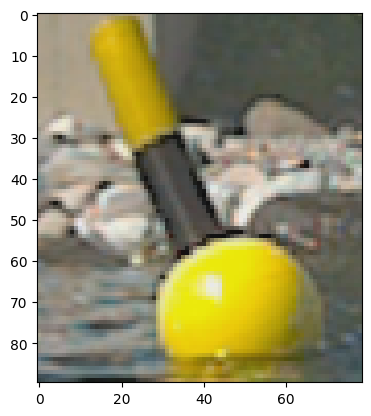

In [51]:
img = cv2.imread('../data/cardinal_buoy.png')
buoy = img[530+10:650-20, 950+1:1030]
buoy = cv2.cvtColor(buoy, cv2.COLOR_BGR2RGB)
plt.imshow(buoy)

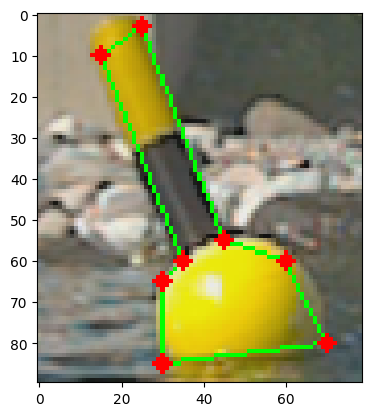

In [52]:
keypoints = np.array([(30, 85), (30, 65), (35, 60),(15, 10), (25, 3), (45, 55), (60, 60), (70,80)], np.int32)
keypoints = keypoints.reshape((-1, 1, 2))


buoy_drawn = np.copy(buoy)
cv2.polylines(buoy_drawn, [keypoints], isClosed=True, color=(0, 255, 0), thickness=1)

for point in keypoints:
    cv2.circle(buoy_drawn, tuple(point[0]), 2, color=(255, 0, 0), thickness=-1)

plt.imshow(buoy_drawn)
plt.show()

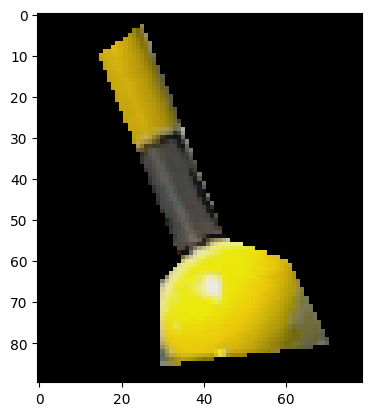

In [53]:
# get a mask from the keypoints, then show original image where mask is true, and leave black elsewhere
mask = np.zeros(buoy.shape, dtype=np.uint8)
cv2.fillPoly(mask, [keypoints], color=(255, 255, 255))

buoy_masked = np.copy(buoy)
buoy_masked[mask == 0] = 0
plt.imshow(buoy_masked)

6


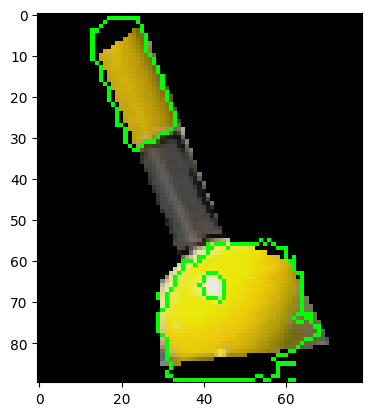

In [54]:
# get yellow mask
hsv_buoy = cv2.cvtColor(buoy, cv2.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
thresh = cv2.inRange(hsv_buoy, lower_yellow, upper_yellow)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

contours_drawn = cv2.drawContours(buoy_masked, contours, -1, (0,255,0), 1)
plt.imshow(contours_drawn)

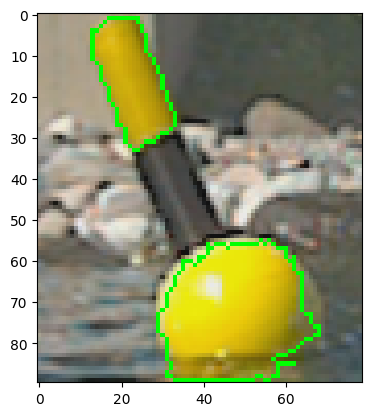

In [59]:
# get only the parent contours
mask_area = cv2.countNonZero(thresh)
big_contours = []
for contour in contours:
    if cv2.contourArea(contour) > 0.2*mask_area:
        big_contours.append(contour)

cv2.drawContours(buoy, big_contours, -1, (0,255,0), 1)
plt.imshow(buoy)